In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [46]:
os.chdir("C:\\Users\\Divyam\\Desktop\\Shark Tank India")


In [47]:
pwd

'C:\\Users\\Divyam\\Desktop\\Shark Tank India'

In [48]:
shark_tank = pd.read_csv(r"Shark Tank India.csv")

In [49]:
shark_tank.head()

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


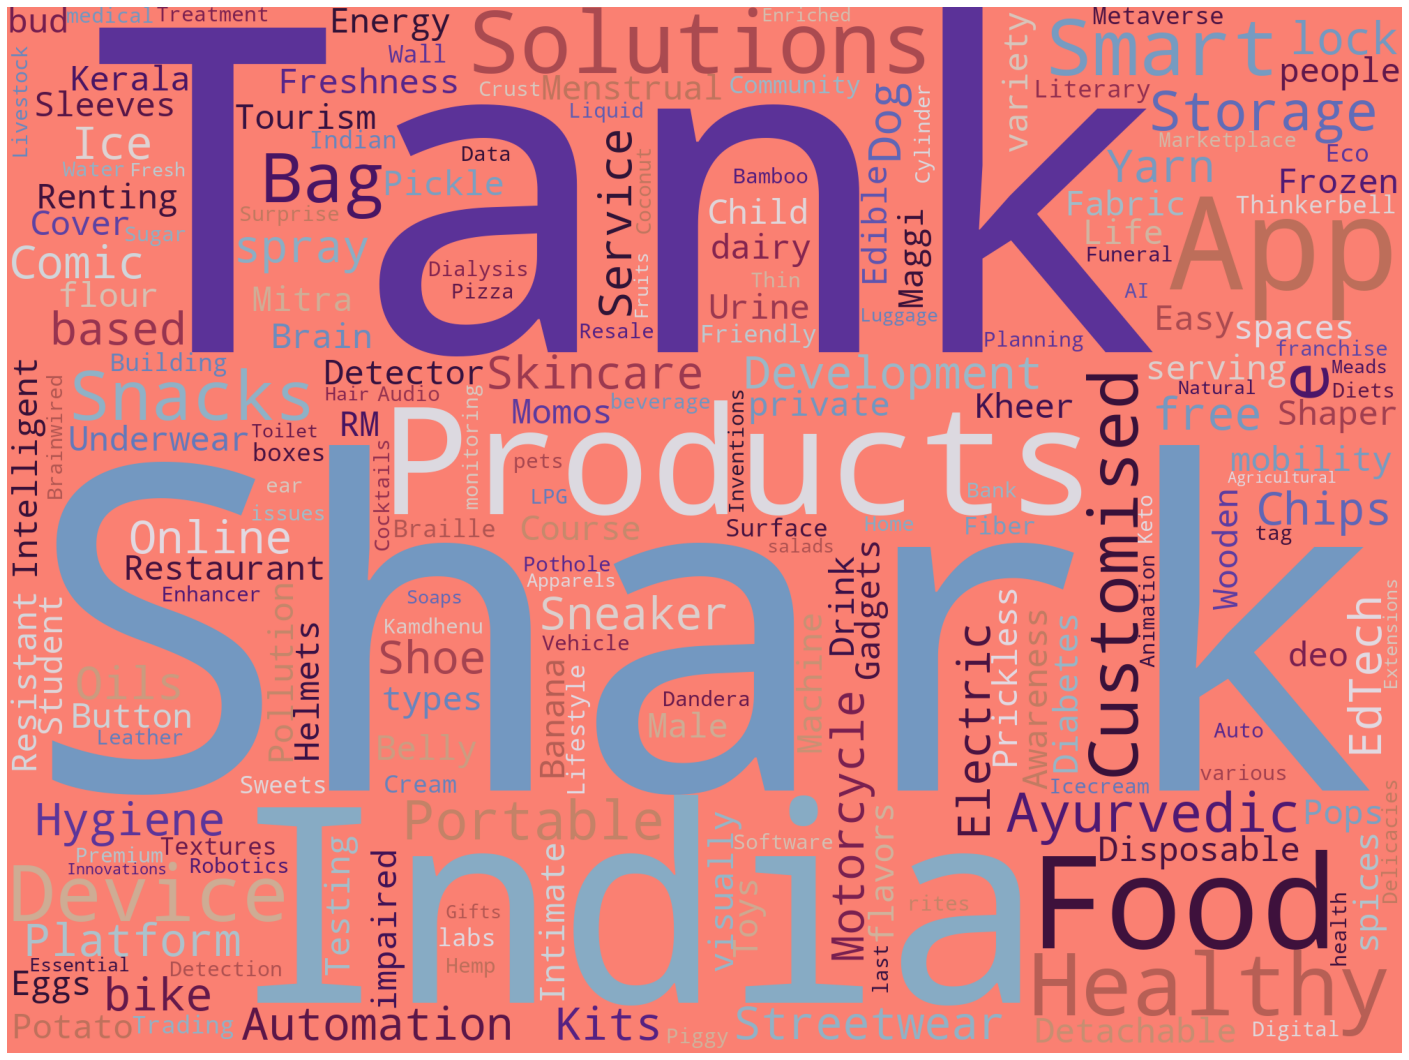

In [32]:
# Word cloud based on business description
from wordcloud import WordCloud, STOPWORDS
text = " Shark Tank India ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ko"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='twilight_shifted_r', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [5]:
shark_tank = shark_tank.fillna(0)

In [33]:
pd.DataFrame({'Number of episoded': [shark_tank['Episode Number'].max()],
              'Total Pitches' : [shark_tank['Pitch Number'].max()],
              'Total Invested Amount(in Lakhs)':[int(shark_tank['Total Deal Amount'].sum())],
              'Total Equity':[int(shark_tank['Total Deal Equity'].sum())],
              'Number of Deals Closed':[shark_tank['Accepted Offer'].value_counts()[1]]
             })

,Number of episoded,Total Pitches,Total Invested Amount(in Lakhs),Total Equity,Number of Deals Closed
0,36,121,3903,1064,67


C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


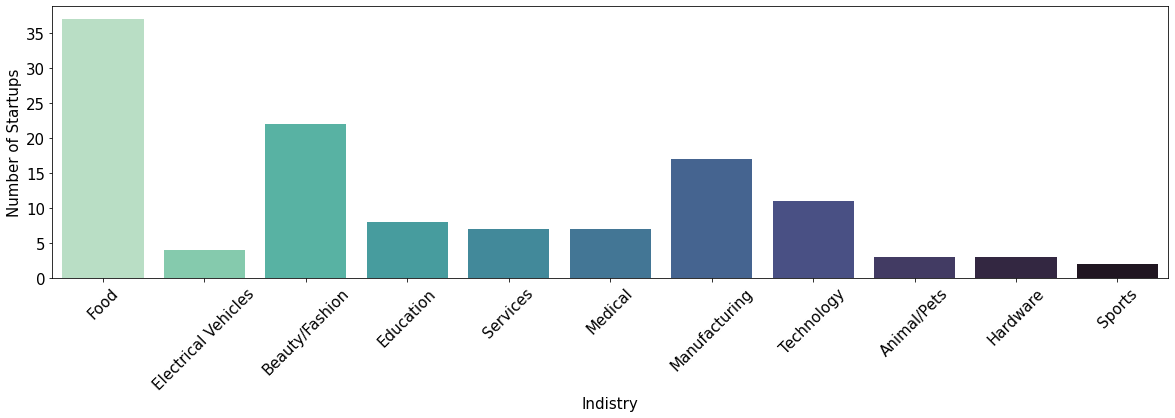

In [53]:
plt.figure(figsize=(20,5))
sns.countplot(shark_tank['Industry'], palette='mako_r')
plt.ylabel('Number of Startups',fontsize=15)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('Indistry',fontsize=15)
plt.show()

C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


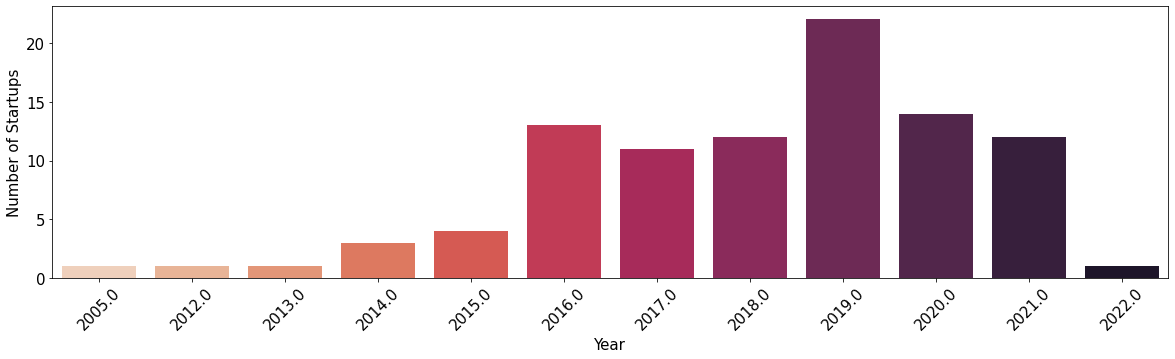

In [57]:
plt.figure(figsize=(20,5))
sns.countplot(shark_tank[shark_tank['Started in']!=0]['Started in'], palette='rocket_r')
plt.ylabel('Number of Startups',fontsize=15)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.show()

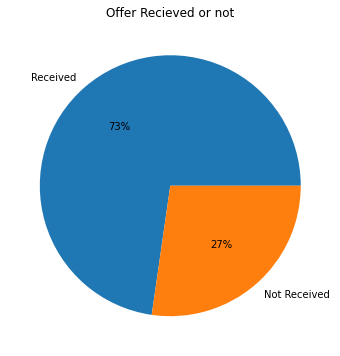

In [61]:
data = [shark_tank['Received Offer'].sum(), shark_tank.shape[0]-shark_tank['Received Offer'].sum()]
labels = ['Received', 'Not Received']
plt.figure(figsize=(12,6))
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.title('Offer Recieved or not')
plt.show()

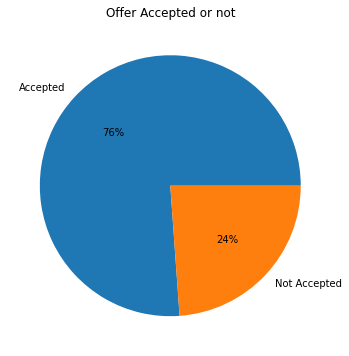

In [64]:
data = [shark_tank['Accepted Offer'].sum(), shark_tank['Received Offer'].sum()-shark_tank['Accepted Offer'].sum()]
labels = ['Accepted', 'Not Accepted']
plt.figure(figsize=(12,6))
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.title('Offer Accepted or not')
plt.show()

Text(0.5, 1.0, 'Number of Presenters Per Pitch')

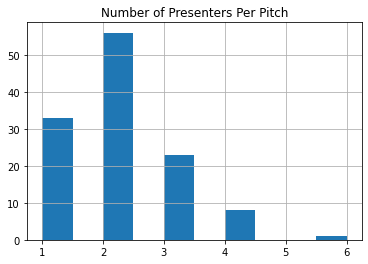

In [66]:
shark_tank['Number of Presenters'].hist()
plt.title('Number of Presenters Per Pitch')


In [67]:
shark_tank['Male Presenters'].sum()

177.0

In [68]:
shark_tank['Female Presenters'].sum()

75.0

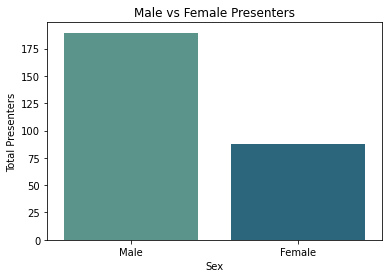

In [90]:
df = pd.DataFrame({
    'Total Presenters':[shark_tank['Male Presenters'].sum() + (shark_tank['Couple Presenters'].sum()/2),shark_tank['Female Presenters'].sum()+(shark_tank['Couple Presenters'].sum()/2)],
    'Sex':['Male','Female']
})
plt.title('Male vs Female Presenters')
sns.barplot(y='Total Presenters', x='Sex', data=df, palette='crest')
plt.show()

<AxesSubplot:>

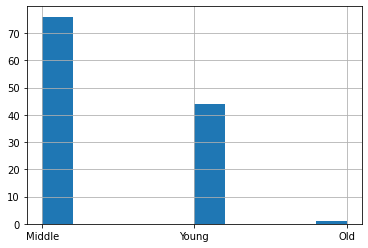

In [80]:
shark_tank['Pitchers Average Age'].hist()

C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Gujarat'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Punjab'),
  Text(4, 0, 'Maharashtra'),
  Text(5, 0, 'Punjab, Delhi'),
  Text(6, 0, 'Bihar'),
  Text(7, 0, 'Telangana'),
  Text(8, 0, '0'),
  Text(9, 0, 'Kerala'),
  Text(10, 0, 'West Bengal'),
  Text(11, 0, 'Tamil Nadu'),
  Text(12, 0, 'Rajasthan'),
  Text(13, 0, 'Madhya Pradesh'),
  Text(14, 0, 'Haryana'),
  Text(15, 0, 'Karnataka, West Bengal'),
  Text(16, 0, 'Jammu & Kashmir'),
  Text(17, 0, 'Uttar Pradesh'),
  Text(18, 0, 'Uttarakhand'),
  Text(19, 0, 'Goa'),
  Text(20, 0, 'Maharashtra, Delhi')])

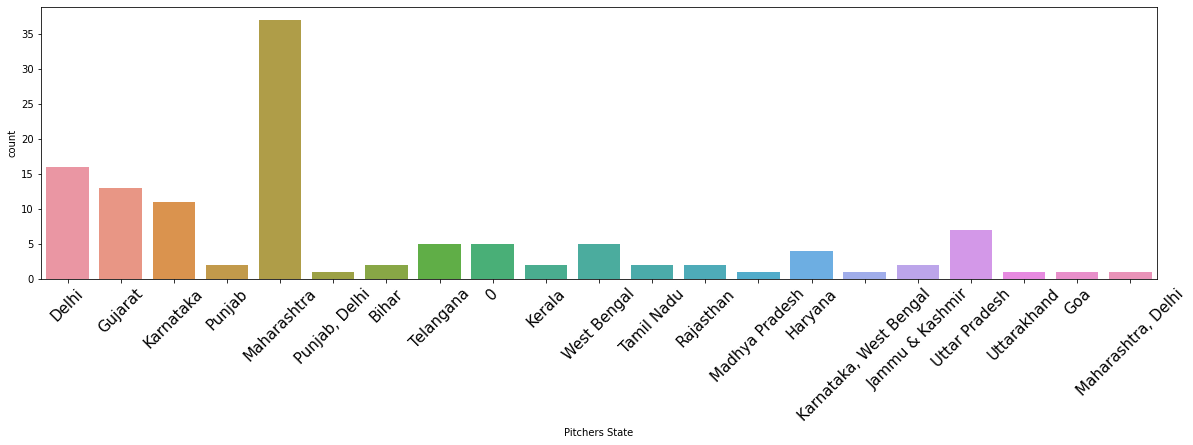

In [92]:
plt.figure(figsize=(20,5))
sns.countplot('Pitchers State',data=shark_tank)
plt.xticks(size=15,rotation=45)

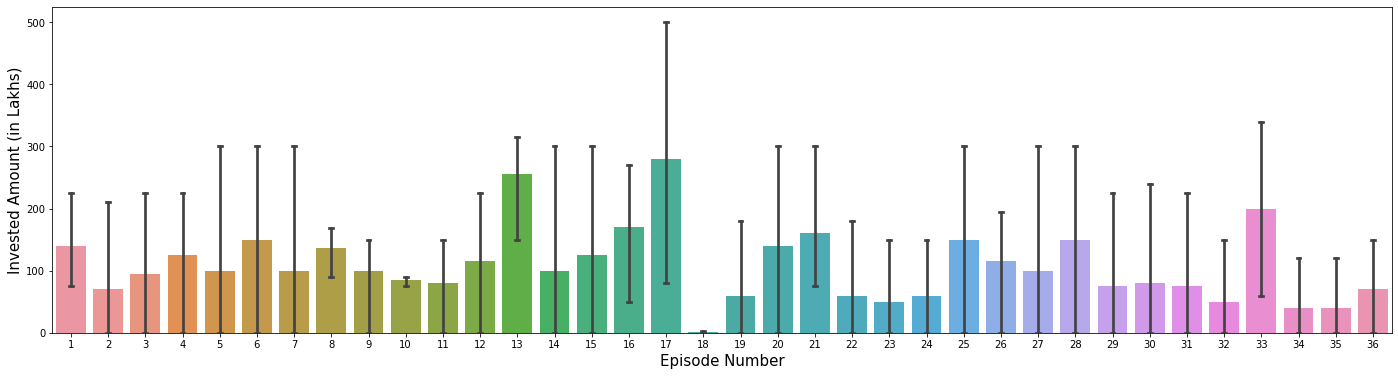

In [103]:
plt.figure(figsize=(24,6))
sns.barplot(data=shark_tank, x="Episode Number", y="Total Deal Amount", estimator=np.sum, capsize=0.1)
plt.ylabel('Invested Amount (in Lakhs)',fontsize=15)
plt.xlabel('Episode Number',fontsize=15)
plt.show()

In [109]:
df1=shark_tank[['Startup Name','Valuation Requested']].sort_values(by='Valuation Requested',ascending=False).head(10)
df1

,Startup Name,Valuation Requested
30,Gopal's 56,120000
118,French Crown,45455
6,qZense Labs,40000
96,Shades of Spring,30000
69,Moonshine,16000
59,Keto India,12000
72,Urban Monkey,10000
87,Insurance Samadhan,10000
17,Hecoll,10000
12,Revamp Moto,10000


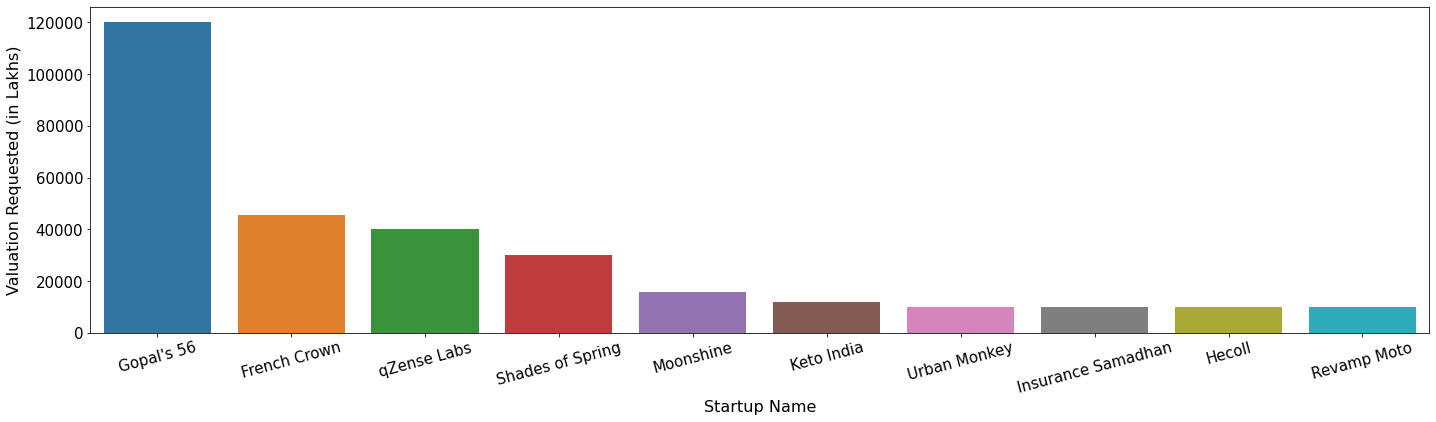

In [129]:
plt.figure(figsize=(24,6))
sns.barplot(x='Startup Name',y='Valuation Requested',data=df1)
plt.ylabel('Valuation Requested (in Lakhs)',fontsize=16)
plt.xlabel('Startup Name',fontsize=16)
plt.xticks(fontsize=15,rotation=15)
plt.yticks(fontsize=15)
plt.show()

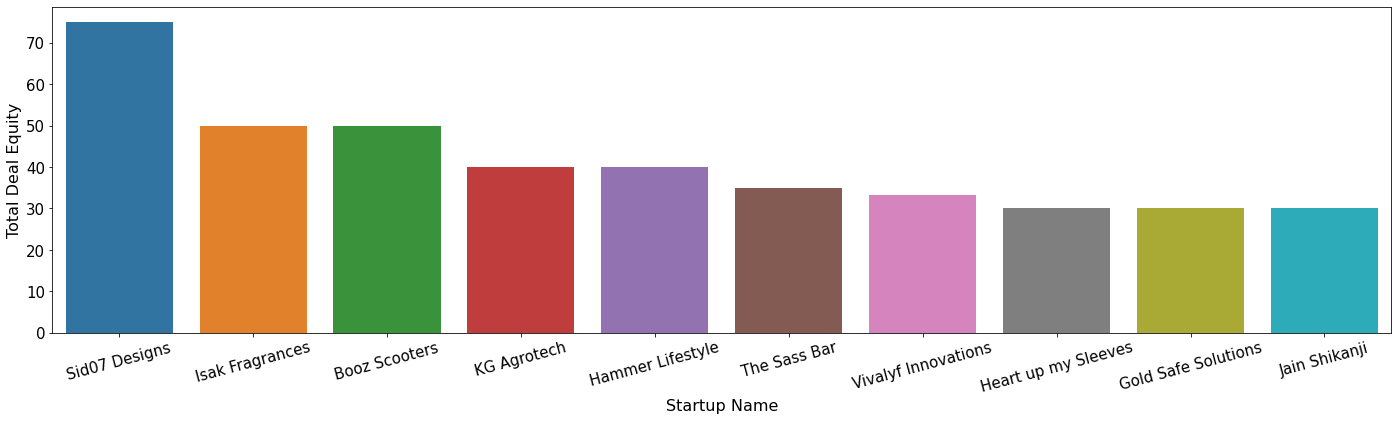

In [135]:
df2=shark_tank[['Startup Name','Total Deal Equity']].sort_values(by='Total Deal Equity',ascending=False).head(10)
plt.figure(figsize=(24,6))
sns.barplot(x='Startup Name',y='Total Deal Equity',data=df2)
plt.ylabel('Total Deal Equity' ,fontsize=16)
plt.xlabel('Startup Name',fontsize=16)
plt.xticks(fontsize=15,rotation=15)
plt.yticks(fontsize=15)
plt.show()

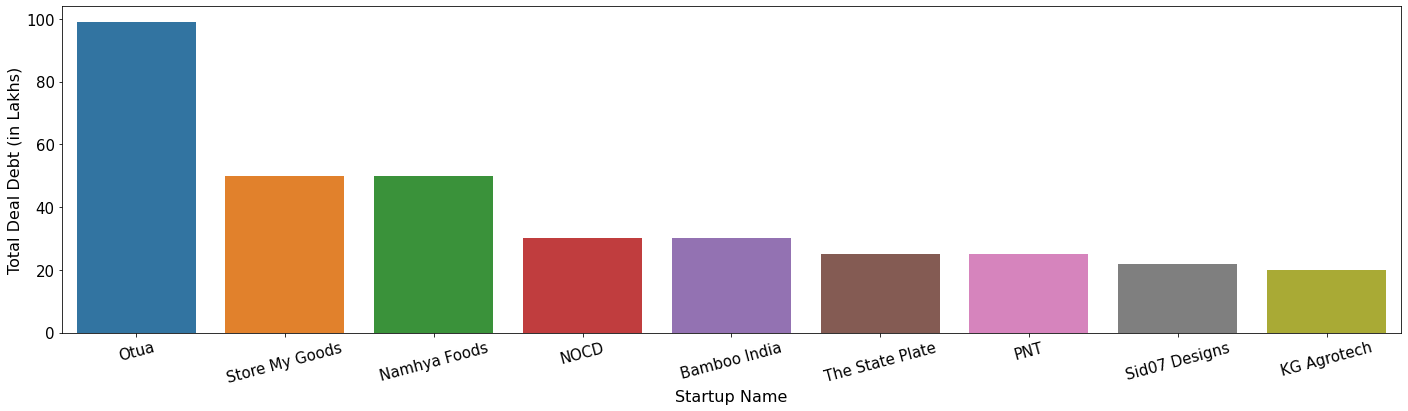

In [136]:
df3=shark_tank[['Startup Name','Total Deal Debt']].sort_values(by='Total Deal Debt',ascending=False).head(9)
plt.figure(figsize=(24,6))
sns.barplot(x='Startup Name',y='Total Deal Debt',data=df3)
plt.ylabel('Total Deal Debt (in Lakhs)',fontsize=16)
plt.xlabel('Startup Name',fontsize=16)
plt.xticks(fontsize=15,rotation=15)
plt.yticks(fontsize=15)
plt.show()

In [10]:
#Portfolios of different sharks

In [11]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Ashneer Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Ashneer Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Ashneer Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,539.33,114.0,93.24


C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


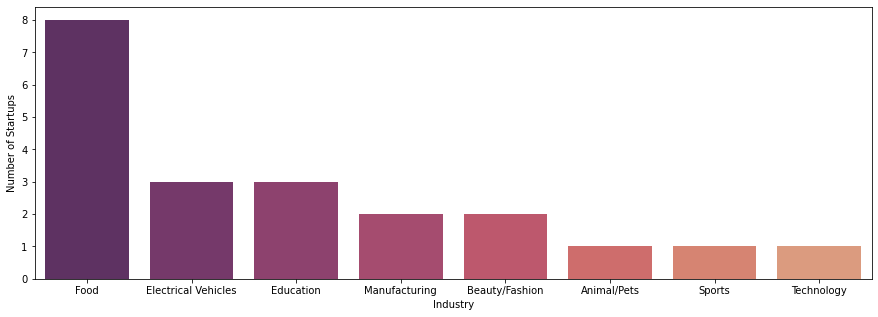

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Ashneer Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [13]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Anupam Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Anupam Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Anupam Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,533.830268,15.0,166.346


C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


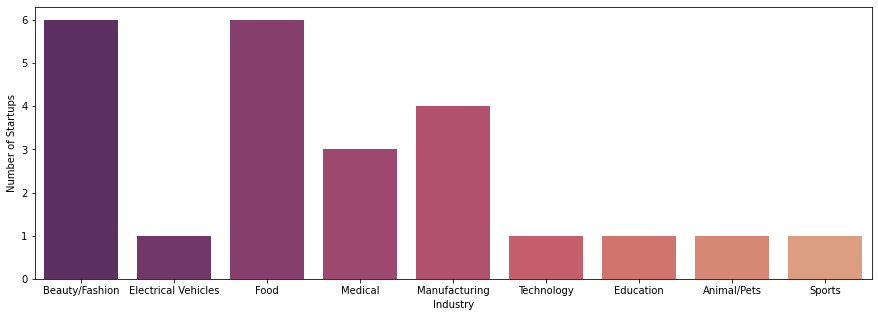

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Anupam Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


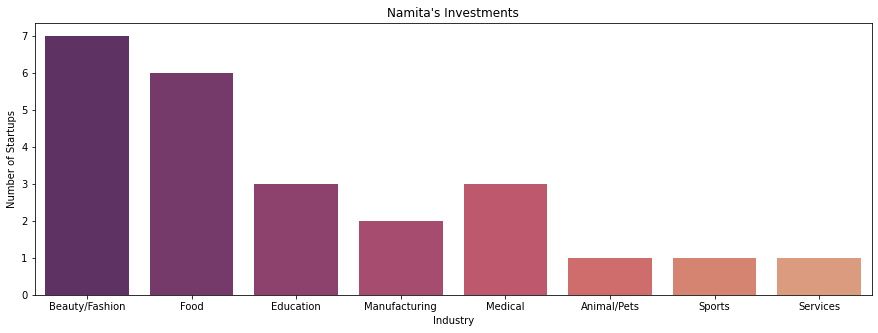

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Namita Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.title("Namita's Investments")
plt.show()

C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


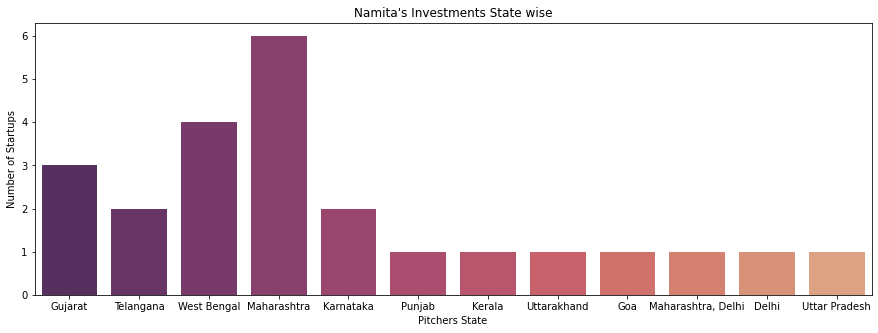

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Namita Investment Amount']!=0]['Pitchers State'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.title("Namita's Investments State wise")
plt.show()

In [18]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Vineeta Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Vineeta Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Vineeta Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,335.32,30.0,135.53


C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


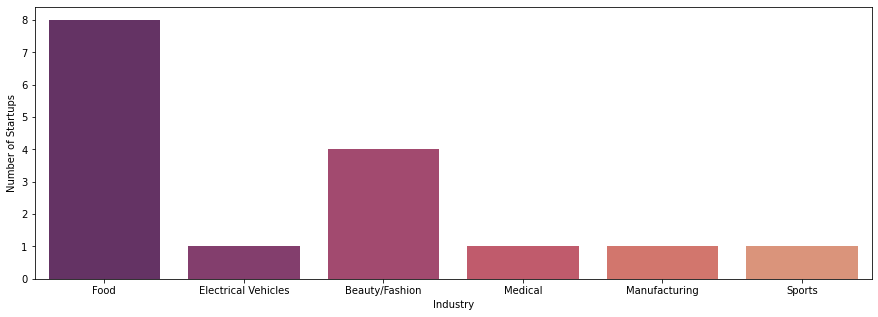

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Vineeta Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


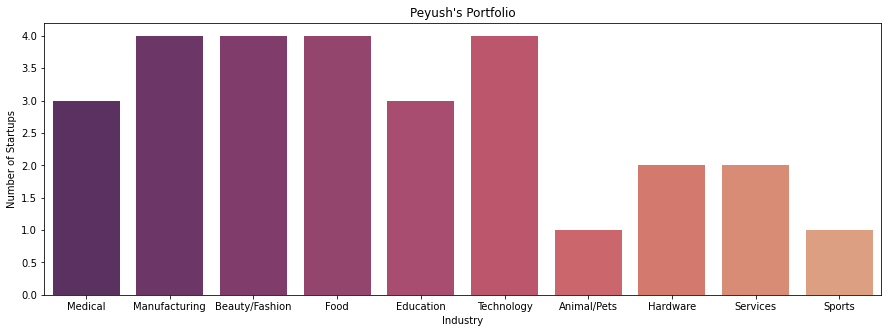

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Peyush Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.title("Peyush's Portfolio")
plt.show()

C:\Users\Divyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


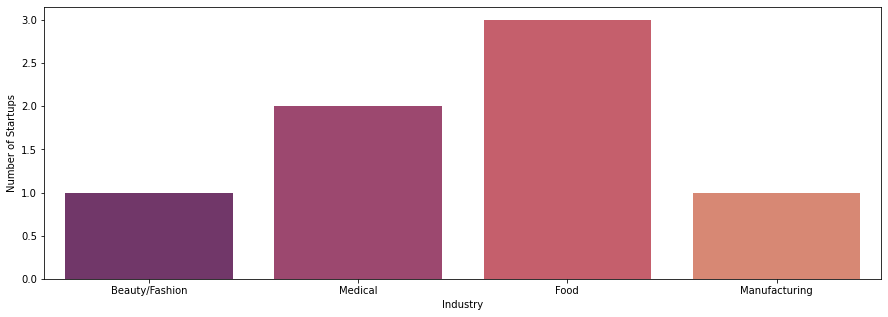

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Ghazal Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()